In [ ]:
import gdown
url = "https://drive.google.com/uc?id=1-CpLBl3W-2I1KBW_W7At-FT5wu9saycr"
output = "data.rar"
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-CpLBl3W-2I1KBW_W7At-FT5wu9saycr
From (redirected): https://drive.google.com/uc?id=1-CpLBl3W-2I1KBW_W7At-FT5wu9saycr&confirm=t&uuid=f04e0800-cd81-4c3e-a7d9-15e913f9f901
To: /content/data.rar
100%|██████████| 24.0M/24.0M [00:01<00:00, 21.9MB/s]


'data.rar'

In [ ]:
!pip install pyunpack patool


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
from pyunpack import Archive
import os

input_file = "data.rar"  # Đường dẫn tới file đã tải
output_dir = "unzip_data"  # Thư mục giải nén

os.makedirs(output_dir, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại
Archive(input_file).extractall(output_dir)

print("Giải nén hoàn tất!")


Giải nén hoàn tất!


In [ ]:
import torch
import random
import numpy as np
# Kiểm tra GPU có khả dụng không
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
'''if device.type == 'cpu':
    raise RuntimeError("No GPU found")'''

print(f'Using device: {device}')

# Đặt random seed
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

Using device: cuda


In [ ]:
import os
import glob
from sklearn.model_selection import train_test_split

# Đường dẫn dữ liệu
data_path = "/content/unzip_data/results"

# Lấy danh sách tất cả các tệp và nhãn
data = []
data_labels = []
categories = []
category_counts = {}
for label_name in os.listdir(data_path):
    categories.append(label_name)
    label_path = os.path.join(data_path, label_name)
    if os.path.isdir(label_path):
        files = glob.glob(os.path.join(label_path, "*"))
        data.extend(files)
        data_labels.extend([label_name] * len(files))

In [ ]:
# Đọc nội dung của tất cả các file
all_contents = []

for file_path in data:
    with open(file_path, "r") as f:
        content = f.read()
        all_contents.append(content)

# all_contents chứa nội dung của tất cả các file
print("Số lượng file đã đọc:", len(all_contents))
print("Nội dung của file đầu tiên:\n", all_contents[0])


Số lượng file đã đọc: 14062
Nội dung của file đầu tiên:
 Dự án xây nhà chọc trời đôi có 30.000 cây 
UAE
Hai tòa nhà hình chữ V cao 190 m và 150 m mang lại những lợi ích của rừng đô thị như hấp thụ bụi mịn, điều hòa khí hậu.
Công ty Italy Stefano Boeri Architetti tiết lộ kế hoạch bổ sung màu xanh cho Dubai với dự án Khu rừng thẳng đứng. Dự án gồm hai tòa nhà chọc trời được hàng nghìn cây xanh bao phủ, đồng thời sở hữu thiết kế bền vững để giúp giảm nhu cầu điện lưới, New Atlas hôm 9/11 đưa tin.
Khu rừng Thẳng đứng là tòa nhà mới nhất trong chuỗi các công trình phủ đầy cây xanh của Stefano Boeri Architetti, bao gồm các tòa nhà ở Trung Quốc, Albania và Hà Lan.
Hai tòa nhà được sắp xếp thành hình chữ V và kết nối với nhau bằng một đế chung. Chúng có chiều cao lần lượt là 190 m và 150 m, dự kiến trồng hơn 2.600 cây thân gỗ và 27.000 cây bụi ở mặt ngoài, cùng với nhiều nhà kính và vườn thủy canh. Ngoài ra, công trình cũng sẽ có nhiều khu vực ban công và sân thượng.
Dự án đặc biệt chú ý đến v

In [ ]:
len(data_labels)

14062

In [ ]:
categories

['khoa-hoc',
 'du-lich',
 'bat-dong-san',
 'the-gioi',
 'giao-duc',
 'suc-khoe',
 'the-thao',
 'thoi-su',
 'doi-song',
 'kinh-doanh',
 'phap-luat',
 'giai-tri']

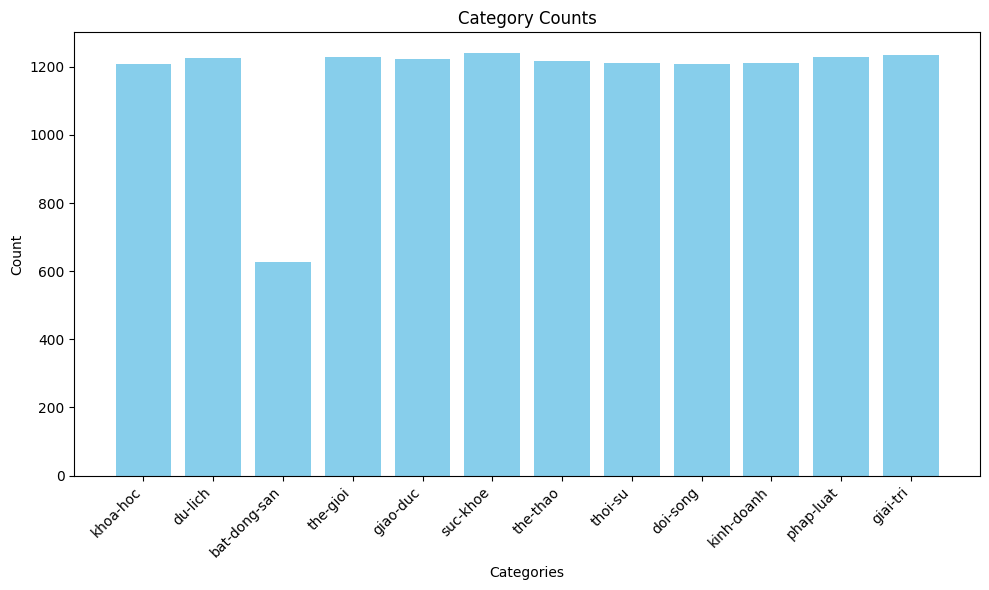

In [ ]:
import matplotlib.pyplot as plt

category_counts = {}
for category in data_labels:
    category_counts[category] = category_counts.get(category, 0) + 1

# Chuyển danh mục và số lượng thành danh sách
labels = list(category_counts.keys())
counts = list(category_counts.values())

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import re
# Danh sách stop words tiếng Việt
stop_words = set([
    "bị", "bởi", "cả", "các", "cái", "cần", "càng", "chỉ", "chiếc", "cho", "chứ", "chưa", "chuyện",
    "có", "có_thể", "cứ", "của", "cùng", "cũng", "đã", "đang", "đây", "để", "đến_nỗi", "đều", "điều",
    "do", "đó", "được", "dưới", "gì", "khi", "không", "là", "lại", "lên", "lúc", "mà", "mỗi", "này",
    "nên", "nếu", "ngay", "nhiều", "như", "nhưng", "những", "nơi", "nữa", "phải", "qua", "ra", "rằng",
    "rất", "rồi", "sau", "sẽ", "so", "sự", "tại", "theo", "thì", "trên", "trước", "từ", "từng",
    "và", "vẫn", "vào", "vậy", "vì", "việc", "với", "vừa"
])
import string
def preprocess_text(text):
    # Chuyển văn bản thành chữ thường
    text = text.lower()

    # Loại bỏ dấu câu
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()

    # Tách văn bản thành các từ (tokens)
    tokens = text.split()

    # Đếm tổng số từ ban đầu
    total_tokens = len(tokens)

    # Loại bỏ các từ thuộc danh sách stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Tính phần trăm các từ stop words đã bị loại bỏ
    removed_stop_words_percent = (total_tokens - len(tokens)) / total_tokens * 100

    # Trả về văn bản đã được xử lý và phần trăm từ stop words đã bị loại bỏ
    return ' '.join(tokens), removed_stop_words_percent

In [ ]:
texts = [preprocess_text(a)[0] for a in (all_contents)]

In [ ]:
(texts[0])

'dự án xây nhà chọc trời đôi 30000 cây uae hai tòa nhà hình chữ v cao 190 m 150 m mang lợi ích rừng đô thị hấp thụ bụi mịn hòa khí hậu công ty italy stefano boeri architetti tiết lộ kế hoạch bổ sung màu xanh dubai dự án khu rừng thẳng đứng dự án gồm hai tòa nhà chọc trời hàng nghìn cây xanh bao phủ đồng thời sở hữu thiết kế bền vững giúp giảm nhu cầu điện lưới new atlas hôm 911 đưa tin khu rừng thẳng đứng tòa nhà mới nhất trong chuỗi công trình phủ đầy cây xanh stefano boeri architetti bao gồm tòa nhà ở trung quốc albania hà lan hai tòa nhà sắp xếp thành hình chữ v kết nối nhau bằng một đế chung chúng chiều cao lần lượt 190 m 150 m dự kiến trồng hơn 2600 cây thân gỗ 27000 cây bụi ở mặt ngoài nhà kính vườn thủy canh ngoài công trình khu vực ban công sân thượng dự án đặc biệt chú ý đến bảo tồn nước dubai thường xuyên khô hạn hệ thống khử muối lắp đặt hệ thống tái chế nước xám nước thải sinh hoạt tắm giặt lau nhà nấu ăn tiêu chuẩn ngoài tòa nhà giảm mức sử dụng điện lưới nhờ hệ thống quan

In [ ]:
deleted = [preprocess_text(a)[1] for a in (all_contents)]

In [ ]:

average_deleted = sum(deleted) / len(deleted) if deleted else 0

print(average_deleted, "%")

18.323558701333017 %


In [ ]:
label_to_number = {label: idx for idx, label in enumerate(set(data_labels))}
numeric_labels = [label_to_number[label] for label in data_labels]
print("Label to Number Mapping:", label_to_number)
print("Numeric Labels:", numeric_labels)


Label to Number Mapping: {'the-gioi': 0, 'giai-tri': 1, 'giao-duc': 2, 'suc-khoe': 3, 'du-lich': 4, 'phap-luat': 5, 'thoi-su': 6, 'bat-dong-san': 7, 'khoa-hoc': 8, 'the-thao': 9, 'kinh-doanh': 10, 'doi-song': 11}
Numeric Labels: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [ ]:
from sklearn.model_selection import train_test_split

texts_1, texts_test, y_1, y_test = train_test_split(texts, numeric_labels, test_size=0.2, stratify=numeric_labels, random_state=42)
texts_train, texts_val, y_train, y_val = train_test_split(texts_1, y_1, test_size=0.25, stratify=y_1, random_state=42)
# train : val : test = 6 : 2 : 2

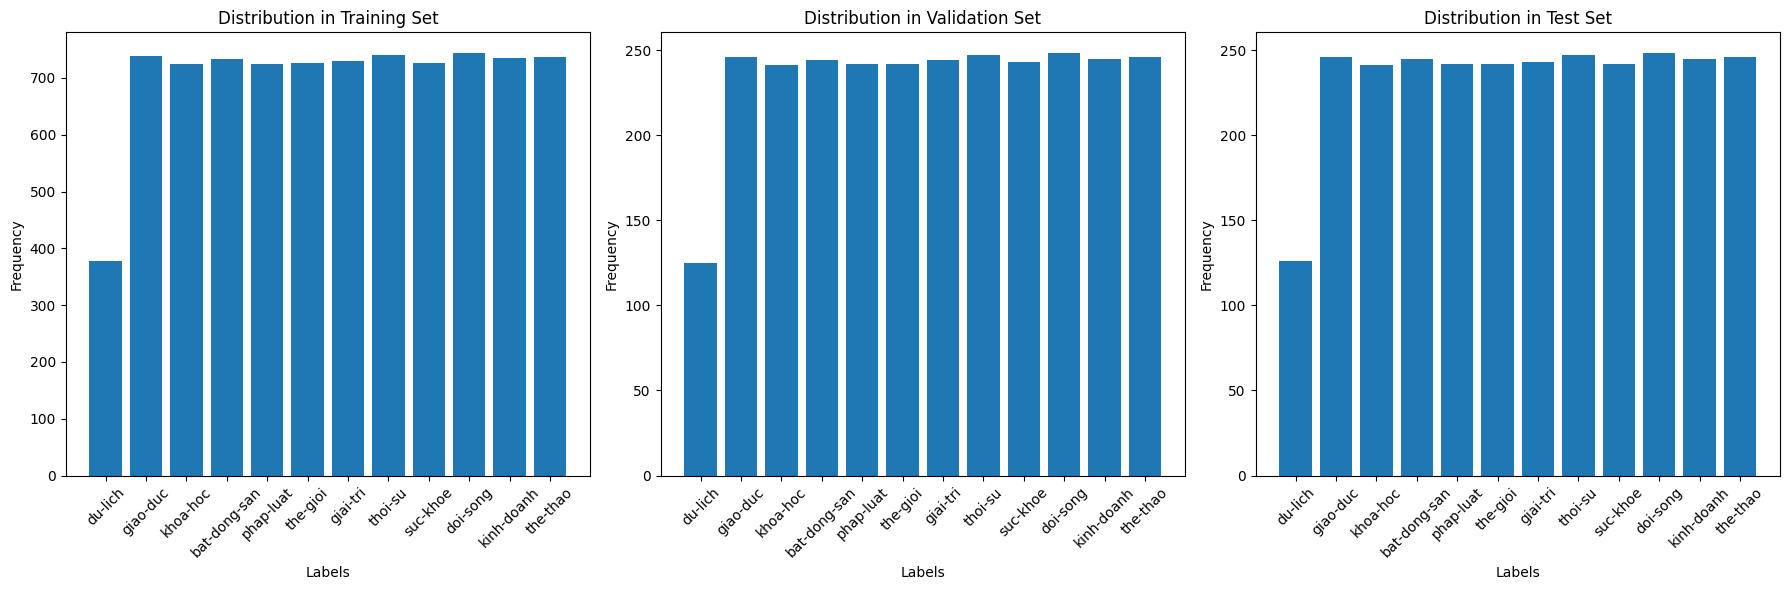

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mapping từ số sang tên nhãn
label_to_name = {
    0: 'du-lich', 1: 'giao-duc', 2: 'khoa-hoc', 3: 'bat-dong-san',
    4: 'phap-luat', 5: 'the-gioi', 6: 'giai-tri', 7: 'thoi-su',
    8: 'suc-khoe', 9: 'doi-song', 10: 'kinh-doanh', 11: 'the-thao'
}

# Hàm vẽ biểu đồ phân phối
def plot_distribution(ax, labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    label_names = [label_to_name[label] for label in unique]

    ax.bar(label_names, counts)
    ax.set_title(title)
    ax.set_xlabel('Labels')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)  # Xoay nhãn cho dễ đọc

# Tạo một cửa sổ với 3 subplot (1 dòng, 3 cột)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ phân phối cho từng tập dữ liệu trong từng subplot
plot_distribution(axes[0], y_train, "Distribution in Training Set")
plot_distribution(axes[1], y_val, "Distribution in Validation Set")
plot_distribution(axes[2], y_test, "Distribution in Test Set")

# Tự động điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị kết quả
plt.show()



In [ ]:
len(texts_test)

2813

In [ ]:
len(texts_1)

11249

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)

X_train_tfidf = tfidf_vectorizer.fit_transform(texts_train)
X_val_tfidf = tfidf_vectorizer.transform(texts_val)
X_test_tfidf = tfidf_vectorizer.transform(texts_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Các giá trị của max_depth để thử, bao gồm cả giá trị mặc định
max_depth_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None]
best_depth = 5
acc_best_depth = 0
for max_depth in max_depth_list:
    print(f"Training DecisionTree with max_depth={max_depth}...")

    # Khởi tạo và huấn luyện mô hình
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train_tfidf, y_train)

    # Dự đoán
    dt_predictions = dt_model.predict(X_val_tfidf)

    # Đánh giá và in kết quả
   # report = classification_report(y_test, dt_predictions)
    acc = accuracy_score(y_val, dt_predictions)

    print(f"max_depth={max_depth}:")
   # print("Classification Report:\n", report)
    print("Accuracy Score:", acc)
    print("-" * 50)
    if acc > acc_best_depth:
        acc_best_depth = acc
        best_depth = max_depth

print(f"Best max_depth: {best_depth} with accuracy: {acc_best_depth}")

dt_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_model.fit(X_train_tfidf, y_train)
dt_predictions = dt_model.predict(X_test_tfidf)
acc = accuracy_score(y_test, dt_predictions)
print(f"Best max_depth: {best_depth} with accuracy: {acc}")


Training DecisionTree with max_depth=5...
max_depth=5:
Accuracy Score: 0.31781016708140775
--------------------------------------------------
Training DecisionTree with max_depth=10...
max_depth=10:
Accuracy Score: 0.3885531461073587
--------------------------------------------------
Training DecisionTree with max_depth=15...
max_depth=15:
Accuracy Score: 0.4031283327408461
--------------------------------------------------
Training DecisionTree with max_depth=20...
max_depth=20:
Accuracy Score: 0.3988624244578742
--------------------------------------------------
Training DecisionTree with max_depth=25...
max_depth=25:
Accuracy Score: 0.3945965161749022
--------------------------------------------------
Training DecisionTree with max_depth=30...
max_depth=30:
Accuracy Score: 0.39744045503021685
--------------------------------------------------
Training DecisionTree with max_depth=35...
max_depth=35:
Accuracy Score: 0.39744045503021685
-------------------------------------------------

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Các giá trị của n_estimators để thử
n_estimators_list = [20, 50, 100, 200, 300, 400, 500, 600, 700, 800]
best_n_estimators = 100
acc_best_n_estimators = 0
for n in n_estimators_list:
    print(f"Training RandomForest with n_estimators={n}...")

    # Khởi tạo và huấn luyện mô hình
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)

    # Dự đoán
    rf_predictions = rf_model.predict(X_val_tfidf)

    # Đánh giá và in kết quả
    acc = accuracy_score(y_val, rf_predictions)

    print(f"n_estimators={n}:")
    print("Accuracy Score:", acc)
    print("-" * 50)
    if acc > acc_best_n_estimators:
        acc_best_n_estimators = acc
        best_n_estimators = n

print(f"Best n_estimators: {best_n_estimators} with accuracy: {acc_best_n_estimators}")
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)
acc = accuracy_score(y_test, rf_predictions)
print(f"Best n_estimators: {best_n_estimators} with accuracy: {acc}")


Training RandomForest with n_estimators=20...
n_estimators=20:
Accuracy Score: 0.6057589761820121
--------------------------------------------------
Training RandomForest with n_estimators=50...
n_estimators=50:
Accuracy Score: 0.6836118023462495
--------------------------------------------------
Training RandomForest with n_estimators=100...
n_estimators=100:
Accuracy Score: 0.711340206185567
--------------------------------------------------
Training RandomForest with n_estimators=200...
n_estimators=200:
Accuracy Score: 0.72555990046214
--------------------------------------------------
Training RandomForest with n_estimators=300...
n_estimators=300:
Accuracy Score: 0.7301813011020263
--------------------------------------------------
Training RandomForest with n_estimators=400...
n_estimators=400:
Accuracy Score: 0.7390686100248844
--------------------------------------------------
Training RandomForest with n_estimators=500...
n_estimators=500:
Accuracy Score: 0.7369356558833985
-

In [ ]:
from xgboost import XGBClassifier
best_estimators = 600
rf_model = XGBClassifier(n_estimators=best_n_estimators, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)
acc = accuracy_score(y_test, rf_predictions)
print(f"Best n_estimators: {best_n_estimators} with accuracy: {acc}")

Best n_estimators: 600 with accuracy: 0.7678634909349449


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Các giá trị của n_estimators để thử
n_estimators_list = [20, 50, 100, 200, 300, 400, 500, 600, 700, 800]
best_n_estimators = 100
acc_best_n_estimators = 0
for n in n_estimators_list:
    print(f"Training XGBoost with n_estimators={n}...")

    # Khởi tạo và huấn luyện mô hình
    xgb_model = XGBClassifier(n_estimators=n, random_state=42)
    xgb_model.fit(X_train_tfidf, y_train)

    # Dự đoán
    xgb_predictions = xgb_model.predict(X_val_tfidf)

    # Đánh giá và in kết quả
    acc = accuracy_score(y_val, xgb_predictions)

    print(f"n_estimators={n}:")
    print("Accuracy Score:", acc)
    print("-" * 50)
    if acc > acc_best_n_estimators:
        acc_best_n_estimators = acc
        best_n_estimators = n

print(f"Best n_estimators: {best_n_estimators} with accuracy: {acc_best_n_estimators}")
xgb_model = XGBClassifier(n_estimators=best_n_estimators, random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_predictions = xgb_model.predict(X_test_tfidf)
acc = accuracy_score(y_test, xgb_predictions)
print(f"Best n_estimators: {best_n_estimators} with accuracy: {acc}")


In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')
embeded = AutoModel.from_pretrained('vinai/phobert-base').to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [ ]:
# Chuyển đổi từ thành vector.
def encode_texts(texts, tokenizer, embedder, max_length=128):
    encoded_texts = []  # Danh sách để lưu văn bản sau khi mã hóa.

    for text in tqdm(texts, desc="Chuyển từ thành vector"):
        # Chuyển văn bản thành các tensor đầu vào cho mô hình, cắt hoặc padding đến độ dài tối đa.
        inputs = tokenizer(text, return_tensors="pt", max_length=max_length, truncation=True, padding="max_length").to(device)

        # Không tính gradient vì chỉ thực hiện suy luận (inference), không huấn luyện.
        with torch.no_grad():
            outputs = embedder(**inputs)  # Truyền các tensor đầu vào qua mô hình để lấy các vector mã hóa.

        # Lấy vector mã hóa từ `last_hidden_state` và loại bỏ chiều batch.
        encoded_texts.append(outputs.last_hidden_state.squeeze(0))

    # Chuyển danh sách các tensor thành một tensor duy nhất.
    return torch.stack(encoded_texts)


In [ ]:
len(texts_train)

8436

In [ ]:
from tqdm import tqdm
x_train = encode_texts(texts_train, tokenizer, embeded)
x_val = encode_texts(texts_val, tokenizer, embeded)

Chuyển từ thành vector: 100%|██████████| 2813/2813 [00:32<00:00, 86.23it/s]


In [ ]:
from torch.utils.data import Dataset

class GetData(Dataset):
  def __init__(self, texts, labels):
    self.texts = texts
    self.labels = labels
  def __len__(self):
    return len(self.texts)
  def __getitem__(self, idx):
    return self.texts[idx], self.labels[idx]



In [ ]:
len(x_train[0][0])

768

In [ ]:
x_val.shape

torch.Size([2813, 128, 768])

In [ ]:
from torch.utils.data import DataLoader

train_dataset = GetData(x_train, y_train)
val_dataset = GetData(x_val, y_val)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)


In [ ]:
import torch.nn as nn

class RNNClassifier(nn.Module):
    def __init__(self, input_size,  output_size, hidden_size = 128, num_layers=1):
        super(RNNClassifier, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.rnn.num_layers, x.size(0), self.rnn.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=128, num_layers=1):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize the hidden state (h0) and cell state (c0)
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)

        # Forward propagate through LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Pass the output of the last time step to the fully connected layer
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
model_lstm = LSTMClassifier(x_train.shape[2], 12).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr = 0.0001)
model_lstm

LSTMClassifier(
  (lstm): LSTM(768, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=12, bias=True)
)

In [ ]:
from tqdm import tqdm
max_val_acc=0
epochs = 40
for epoch in range(epochs):
  total_loss_train=0
  total_acc_train=0
  for x, y in tqdm(train_dataloader):

    x = x.to(device)
    y = y.to(device)

    output = model_lstm(x)
    output = output.to(device)
    batch_loss = criterion(output, y)
    total_loss_train += batch_loss.item()

    acc = (output.argmax(dim=1)==y).sum().item()
    total_acc_train += acc

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()

  total_loss_val=0
  total_acc_val=0

  with torch.no_grad():
    for x, y in tqdm(val_dataloader):

      x = x.to(device)

      y = y.to(device)
      output = model_lstm(x)

      batch_loss = criterion(output, y)
      total_loss_val += batch_loss.item()

      acc = (output.argmax(dim=1)==y).sum().item()
      total_acc_val += acc

  print(
      f'Epochs: {epoch+1} | Train Loss: {total_loss_train / len(train_dataset):.3f}\
      | Train Accuracy: {total_acc_train/len(train_dataset):.3f}\
      | Val Loss: {total_loss_val/len(val_dataset):.3f}\
      | Val Accuracy:{total_acc_val/len(val_dataset):.3f}'
  )

  if max_val_acc < total_acc_val/len(val_dataset):
    max_val_acc = total_acc_val/len(val_dataset)
    torch.save(model_lstm.state_dict(), "simplemodel.pt")
    print(f"Save model because higher val acc {max_val_acc:.3f}")


100%|██████████| 176/176 [00:00<00:00, 713.18it/s]


Epochs: 1 | Train Loss: 0.111      | Train Accuracy: 0.497      | Val Loss: 0.073      | Val Accuracy:0.678
Save model because higher val acc 0.678


100%|██████████| 176/176 [00:00<00:00, 717.27it/s]


Epochs: 2 | Train Loss: 0.063      | Train Accuracy: 0.706      | Val Loss: 0.060      | Val Accuracy:0.724
Save model because higher val acc 0.724


100%|██████████| 176/176 [00:00<00:00, 700.46it/s]


Epochs: 3 | Train Loss: 0.053      | Train Accuracy: 0.742      | Val Loss: 0.052      | Val Accuracy:0.756
Save model because higher val acc 0.756


100%|██████████| 176/176 [00:00<00:00, 714.27it/s]


Epochs: 4 | Train Loss: 0.046      | Train Accuracy: 0.774      | Val Loss: 0.049      | Val Accuracy:0.760
Save model because higher val acc 0.760


100%|██████████| 176/176 [00:00<00:00, 594.47it/s]


Epochs: 5 | Train Loss: 0.045      | Train Accuracy: 0.780      | Val Loss: 0.048      | Val Accuracy:0.766
Save model because higher val acc 0.766


100%|██████████| 176/176 [00:00<00:00, 685.33it/s]


Epochs: 6 | Train Loss: 0.042      | Train Accuracy: 0.791      | Val Loss: 0.046      | Val Accuracy:0.773
Save model because higher val acc 0.773


100%|██████████| 176/176 [00:00<00:00, 693.16it/s]


Epochs: 7 | Train Loss: 0.038      | Train Accuracy: 0.816      | Val Loss: 0.043      | Val Accuracy:0.784
Save model because higher val acc 0.784


100%|██████████| 176/176 [00:00<00:00, 695.68it/s]


Epochs: 8 | Train Loss: 0.038      | Train Accuracy: 0.813      | Val Loss: 0.041      | Val Accuracy:0.804
Save model because higher val acc 0.804


100%|██████████| 176/176 [00:00<00:00, 689.58it/s]


Epochs: 9 | Train Loss: 0.035      | Train Accuracy: 0.828      | Val Loss: 0.042      | Val Accuracy:0.788


100%|██████████| 176/176 [00:00<00:00, 695.89it/s]


Epochs: 10 | Train Loss: 0.032      | Train Accuracy: 0.843      | Val Loss: 0.040      | Val Accuracy:0.799


100%|██████████| 176/176 [00:00<00:00, 600.12it/s]


Epochs: 11 | Train Loss: 0.032      | Train Accuracy: 0.844      | Val Loss: 0.039      | Val Accuracy:0.809
Save model because higher val acc 0.809


100%|██████████| 176/176 [00:00<00:00, 688.23it/s]


Epochs: 12 | Train Loss: 0.029      | Train Accuracy: 0.855      | Val Loss: 0.040      | Val Accuracy:0.802


100%|██████████| 176/176 [00:00<00:00, 689.74it/s]


Epochs: 13 | Train Loss: 0.028      | Train Accuracy: 0.863      | Val Loss: 0.038      | Val Accuracy:0.803


100%|██████████| 176/176 [00:00<00:00, 693.05it/s]


Epochs: 14 | Train Loss: 0.025      | Train Accuracy: 0.875      | Val Loss: 0.039      | Val Accuracy:0.804


100%|██████████| 176/176 [00:00<00:00, 683.89it/s]


Epochs: 15 | Train Loss: 0.025      | Train Accuracy: 0.875      | Val Loss: 0.038      | Val Accuracy:0.816
Save model because higher val acc 0.816


100%|██████████| 176/176 [00:00<00:00, 696.96it/s]


Epochs: 16 | Train Loss: 0.022      | Train Accuracy: 0.891      | Val Loss: 0.046      | Val Accuracy:0.769


100%|██████████| 176/176 [00:00<00:00, 614.29it/s]


Epochs: 17 | Train Loss: 0.021      | Train Accuracy: 0.894      | Val Loss: 0.036      | Val Accuracy:0.824
Save model because higher val acc 0.824


100%|██████████| 176/176 [00:00<00:00, 706.56it/s]


Epochs: 18 | Train Loss: 0.019      | Train Accuracy: 0.905      | Val Loss: 0.036      | Val Accuracy:0.824


100%|██████████| 176/176 [00:00<00:00, 696.28it/s]


Epochs: 19 | Train Loss: 0.018      | Train Accuracy: 0.913      | Val Loss: 0.038      | Val Accuracy:0.821


100%|██████████| 176/176 [00:00<00:00, 695.31it/s]


Epochs: 20 | Train Loss: 0.017      | Train Accuracy: 0.921      | Val Loss: 0.039      | Val Accuracy:0.818


100%|██████████| 176/176 [00:00<00:00, 701.07it/s]


Epochs: 21 | Train Loss: 0.016      | Train Accuracy: 0.919      | Val Loss: 0.037      | Val Accuracy:0.825
Save model because higher val acc 0.825


100%|██████████| 176/176 [00:00<00:00, 711.26it/s]


Epochs: 22 | Train Loss: 0.016      | Train Accuracy: 0.926      | Val Loss: 0.036      | Val Accuracy:0.831
Save model because higher val acc 0.831


100%|██████████| 176/176 [00:00<00:00, 602.40it/s]


Epochs: 23 | Train Loss: 0.016      | Train Accuracy: 0.927      | Val Loss: 0.036      | Val Accuracy:0.827


100%|██████████| 176/176 [00:00<00:00, 617.94it/s]


Epochs: 24 | Train Loss: 0.013      | Train Accuracy: 0.937      | Val Loss: 0.036      | Val Accuracy:0.830


100%|██████████| 176/176 [00:00<00:00, 708.42it/s]


Epochs: 25 | Train Loss: 0.012      | Train Accuracy: 0.942      | Val Loss: 0.037      | Val Accuracy:0.833
Save model because higher val acc 0.833


100%|██████████| 176/176 [00:00<00:00, 713.01it/s]


Epochs: 26 | Train Loss: 0.011      | Train Accuracy: 0.947      | Val Loss: 0.037      | Val Accuracy:0.836
Save model because higher val acc 0.836


100%|██████████| 176/176 [00:00<00:00, 716.49it/s]


Epochs: 27 | Train Loss: 0.013      | Train Accuracy: 0.939      | Val Loss: 0.039      | Val Accuracy:0.821


100%|██████████| 176/176 [00:00<00:00, 717.10it/s]


Epochs: 28 | Train Loss: 0.010      | Train Accuracy: 0.955      | Val Loss: 0.038      | Val Accuracy:0.828


100%|██████████| 176/176 [00:00<00:00, 669.76it/s]


Epochs: 29 | Train Loss: 0.009      | Train Accuracy: 0.956      | Val Loss: 0.038      | Val Accuracy:0.831


100%|██████████| 176/176 [00:00<00:00, 599.88it/s]


Epochs: 30 | Train Loss: 0.008      | Train Accuracy: 0.964      | Val Loss: 0.040      | Val Accuracy:0.832


100%|██████████| 176/176 [00:00<00:00, 706.62it/s]


Epochs: 31 | Train Loss: 0.007      | Train Accuracy: 0.969      | Val Loss: 0.039      | Val Accuracy:0.836


100%|██████████| 176/176 [00:00<00:00, 712.56it/s]


Epochs: 32 | Train Loss: 0.008      | Train Accuracy: 0.966      | Val Loss: 0.047      | Val Accuracy:0.809


100%|██████████| 176/176 [00:00<00:00, 703.22it/s]


Epochs: 33 | Train Loss: 0.007      | Train Accuracy: 0.968      | Val Loss: 0.044      | Val Accuracy:0.817


100%|██████████| 176/176 [00:00<00:00, 713.84it/s]


Epochs: 34 | Train Loss: 0.007      | Train Accuracy: 0.970      | Val Loss: 0.040      | Val Accuracy:0.836
Save model because higher val acc 0.836


100%|██████████| 176/176 [00:00<00:00, 705.71it/s]


Epochs: 35 | Train Loss: 0.007      | Train Accuracy: 0.967      | Val Loss: 0.039      | Val Accuracy:0.836


100%|██████████| 176/176 [00:00<00:00, 597.24it/s]


Epochs: 36 | Train Loss: 0.006      | Train Accuracy: 0.973      | Val Loss: 0.051      | Val Accuracy:0.795


100%|██████████| 176/176 [00:00<00:00, 719.89it/s]


Epochs: 37 | Train Loss: 0.007      | Train Accuracy: 0.965      | Val Loss: 0.045      | Val Accuracy:0.819


100%|██████████| 176/176 [00:00<00:00, 711.94it/s]


Epochs: 38 | Train Loss: 0.004      | Train Accuracy: 0.981      | Val Loss: 0.039      | Val Accuracy:0.846
Save model because higher val acc 0.846


100%|██████████| 176/176 [00:00<00:00, 716.57it/s]


Epochs: 39 | Train Loss: 0.005      | Train Accuracy: 0.979      | Val Loss: 0.039      | Val Accuracy:0.842


100%|██████████| 176/176 [00:00<00:00, 710.68it/s]

Epochs: 40 | Train Loss: 0.006      | Train Accuracy: 0.972      | Val Loss: 0.041      | Val Accuracy:0.848
Save model because higher val acc 0.848


In [ ]:
model_lstm.load_state_dict(torch.load("simplemodel.pt"))

<ipython-input-66-7ef4f40975c0>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_lstm.load_state_dict(torch.load("simplemodel.pt"))


<All keys matched successfully>

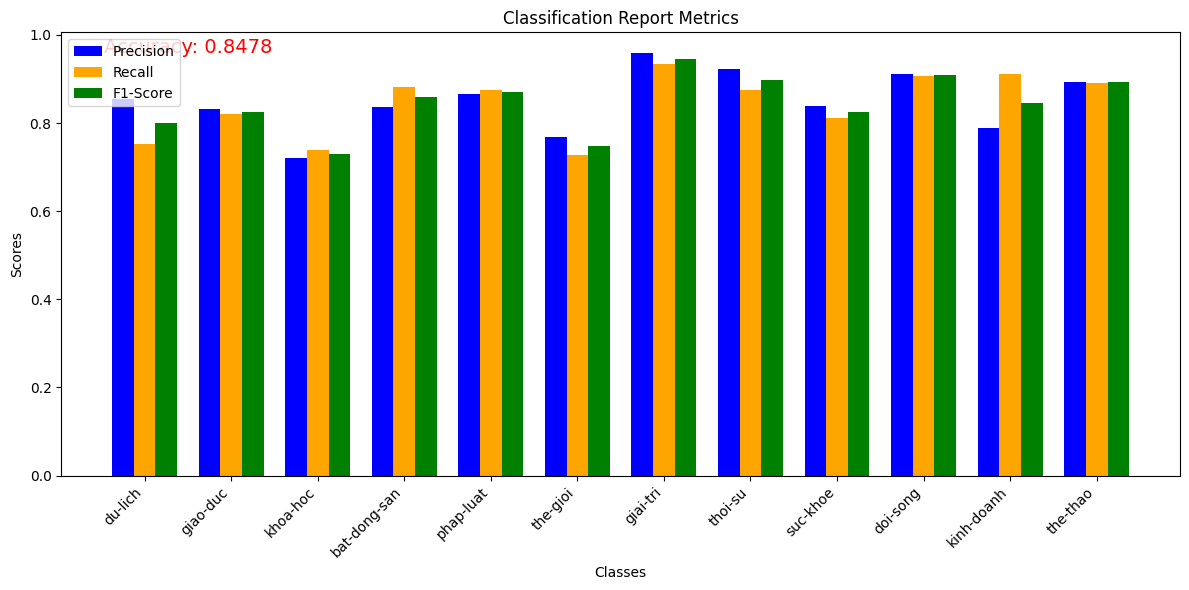

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Load true labels and predictions
true_labels = []
predicted_labels = []

# Evaluate the model
model_lstm.eval()
with torch.no_grad():
    for x, y in val_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model_lstm(x)
        predictions = output.argmax(dim=1)

        true_labels.extend(y.cpu().numpy())
        predicted_labels.extend(predictions.cpu().numpy())

# Define the labels map
labels_map = {
    0: 'du-lich', 1: 'giao-duc', 2: 'khoa-hoc', 3: 'bat-dong-san',
    4: 'phap-luat', 5: 'the-gioi', 6: 'giai-tri', 7: 'thoi-su',
    8: 'suc-khoe', 9: 'doi-song', 10: 'kinh-doanh', 11: 'the-thao'
}

# Generate classification report
class_names = [labels_map[i] for i in range(len(labels_map))]
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Extract precision, recall, f1-score
precision = [report[label]['precision'] for label in class_names]
recall = [report[label]['recall'] for label in class_names]
f1_score = [report[label]['f1-score'] for label in class_names]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Plotting
x = np.arange(len(labels_map))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision', color='blue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Annotating accuracy at the top of the plot
plt.text(0.5, max(precision + recall + f1_score), f'Accuracy: {accuracy:.4f}', ha='center', fontsize=14, color='red')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
x_test = encode_texts(texts_test, tokenizer, embeded)

Chuyển từ thành vector: 100%|██████████| 2813/2813 [00:32<00:00, 86.63it/s]


In [ ]:

test_dataset = GetData(x_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

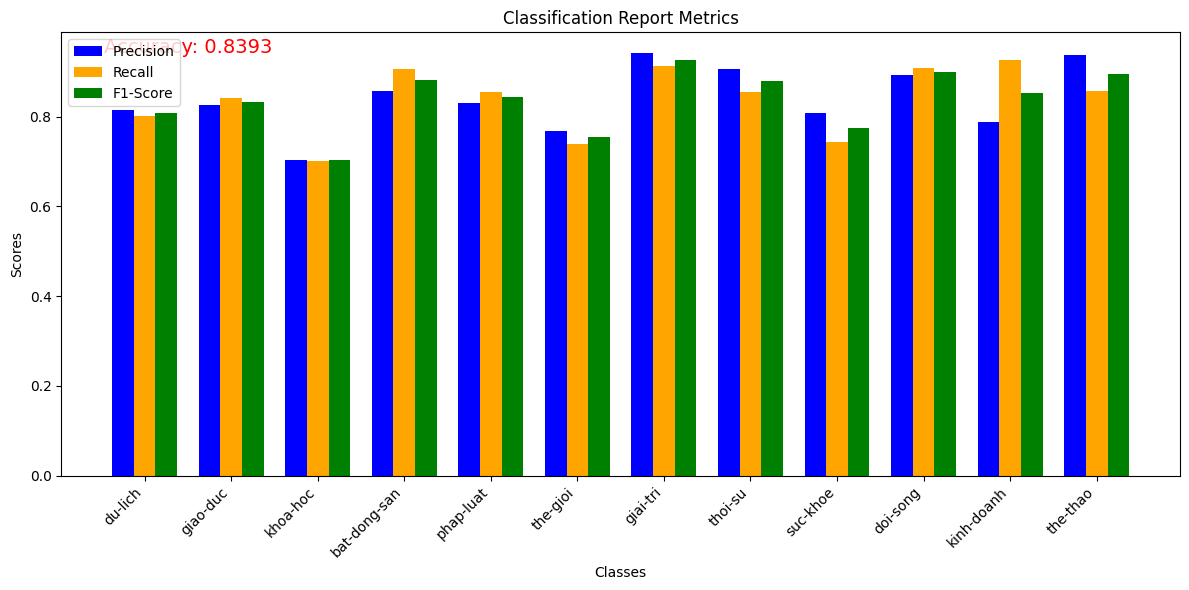

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Load true labels and predictions
true_labels = []
predicted_labels = []

# Evaluate the model
model_lstm.eval()
with torch.no_grad():
    for x, y in test_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model_lstm(x)
        predictions = output.argmax(dim=1)

        true_labels.extend(y.cpu().numpy())
        predicted_labels.extend(predictions.cpu().numpy())

# Define the labels map
labels_map = {
    0: 'du-lich', 1: 'giao-duc', 2: 'khoa-hoc', 3: 'bat-dong-san',
    4: 'phap-luat', 5: 'the-gioi', 6: 'giai-tri', 7: 'thoi-su',
    8: 'suc-khoe', 9: 'doi-song', 10: 'kinh-doanh', 11: 'the-thao'
}

# Generate classification report
class_names = [labels_map[i] for i in range(len(labels_map))]
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Extract precision, recall, f1-score
precision = [report[label]['precision'] for label in class_names]
recall = [report[label]['recall'] for label in class_names]
f1_score = [report[label]['f1-score'] for label in class_names]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Plotting
x = np.arange(len(labels_map))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision', color='blue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Annotating accuracy at the top of the plot
plt.text(0.5, max(precision + recall + f1_score), f'Accuracy: {accuracy:.4f}', ha='center', fontsize=14, color='red')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
model_rnn = RNNClassifier(x_train.shape[2], 12).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_rnn.parameters(), lr = 0.0001)
model_rnn

RNNClassifier(
  (rnn): RNN(768, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=12, bias=True)
)

In [ ]:
from tqdm import tqdm
max_val_acc=0
epochs = 40
for epoch in range(epochs):
  total_loss_train=0
  total_acc_train=0
  for x, y in tqdm(train_dataloader):

    x = x.to(device)
    y = y.to(device)

    output = model_rnn(x)
    output = output.to(device)
    batch_loss = criterion(output, y)
    total_loss_train += batch_loss.item()

    acc = (output.argmax(dim=1)==y).sum().item()
    total_acc_train += acc

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()

  total_loss_val=0
  total_acc_val=0

  with torch.no_grad():
    for x, y in tqdm(val_dataloader):

      x = x.to(device)

      y = y.to(device)
      output = model_rnn(x)

      batch_loss = criterion(output, y)
      total_loss_val += batch_loss.item()

      acc = (output.argmax(dim=1)==y).sum().item()
      total_acc_val += acc

  print(
      f'Epochs: {epoch+1} | Train Loss: {total_loss_train / len(train_dataset):.3f}\
      | Train Accuracy: {total_acc_train/len(train_dataset):.3f}\
      | Val Loss: {total_loss_val/len(val_dataset):.3f}\
      | Val Accuracy:{total_acc_val/len(val_dataset):.3f}'
  )

  if max_val_acc < total_acc_val/len(val_dataset):
    max_val_acc = total_acc_val/len(val_dataset)
    torch.save(model_rnn.state_dict(), "simplemodel1.pt")
    print(f"Save model because higher val acc {max_val_acc:.3f}")


100%|██████████| 176/176 [00:00<00:00, 894.01it/s]


Epochs: 1 | Train Loss: 0.119      | Train Accuracy: 0.509      | Val Loss: 0.087      | Val Accuracy:0.673
Save model because higher val acc 0.673


100%|██████████| 176/176 [00:00<00:00, 1222.34it/s]


Epochs: 2 | Train Loss: 0.071      | Train Accuracy: 0.719      | Val Loss: 0.060      | Val Accuracy:0.738
Save model because higher val acc 0.738


100%|██████████| 176/176 [00:00<00:00, 1248.59it/s]


Epochs: 3 | Train Loss: 0.052      | Train Accuracy: 0.765      | Val Loss: 0.050      | Val Accuracy:0.757
Save model because higher val acc 0.757


100%|██████████| 176/176 [00:00<00:00, 1183.58it/s]


Epochs: 4 | Train Loss: 0.044      | Train Accuracy: 0.795      | Val Loss: 0.046      | Val Accuracy:0.776
Save model because higher val acc 0.776


100%|██████████| 176/176 [00:00<00:00, 1249.41it/s]


Epochs: 5 | Train Loss: 0.039      | Train Accuracy: 0.812      | Val Loss: 0.043      | Val Accuracy:0.785
Save model because higher val acc 0.785


100%|██████████| 176/176 [00:00<00:00, 1086.30it/s]


Epochs: 6 | Train Loss: 0.035      | Train Accuracy: 0.827      | Val Loss: 0.041      | Val Accuracy:0.792
Save model because higher val acc 0.792


100%|██████████| 176/176 [00:00<00:00, 1156.75it/s]


Epochs: 7 | Train Loss: 0.033      | Train Accuracy: 0.839      | Val Loss: 0.040      | Val Accuracy:0.789


100%|██████████| 176/176 [00:00<00:00, 1290.09it/s]


Epochs: 8 | Train Loss: 0.030      | Train Accuracy: 0.847      | Val Loss: 0.039      | Val Accuracy:0.798
Save model because higher val acc 0.798


100%|██████████| 176/176 [00:00<00:00, 1057.39it/s]


Epochs: 9 | Train Loss: 0.028      | Train Accuracy: 0.862      | Val Loss: 0.039      | Val Accuracy:0.800
Save model because higher val acc 0.800


100%|██████████| 176/176 [00:00<00:00, 962.14it/s]


Epochs: 10 | Train Loss: 0.027      | Train Accuracy: 0.870      | Val Loss: 0.038      | Val Accuracy:0.798


100%|██████████| 176/176 [00:00<00:00, 1286.31it/s]


Epochs: 11 | Train Loss: 0.025      | Train Accuracy: 0.878      | Val Loss: 0.038      | Val Accuracy:0.803
Save model because higher val acc 0.803


100%|██████████| 176/176 [00:00<00:00, 1270.75it/s]


Epochs: 12 | Train Loss: 0.024      | Train Accuracy: 0.884      | Val Loss: 0.037      | Val Accuracy:0.807
Save model because higher val acc 0.807


100%|██████████| 176/176 [00:00<00:00, 1210.96it/s]


Epochs: 13 | Train Loss: 0.023      | Train Accuracy: 0.889      | Val Loss: 0.037      | Val Accuracy:0.808
Save model because higher val acc 0.808


100%|██████████| 176/176 [00:00<00:00, 1204.38it/s]


Epochs: 14 | Train Loss: 0.021      | Train Accuracy: 0.896      | Val Loss: 0.039      | Val Accuracy:0.794


100%|██████████| 176/176 [00:00<00:00, 1188.71it/s]


Epochs: 15 | Train Loss: 0.020      | Train Accuracy: 0.907      | Val Loss: 0.037      | Val Accuracy:0.806


100%|██████████| 176/176 [00:00<00:00, 1232.91it/s]


Epochs: 16 | Train Loss: 0.019      | Train Accuracy: 0.909      | Val Loss: 0.037      | Val Accuracy:0.804


100%|██████████| 176/176 [00:00<00:00, 1227.85it/s]


Epochs: 17 | Train Loss: 0.018      | Train Accuracy: 0.917      | Val Loss: 0.038      | Val Accuracy:0.800


100%|██████████| 176/176 [00:00<00:00, 1002.87it/s]


Epochs: 18 | Train Loss: 0.017      | Train Accuracy: 0.922      | Val Loss: 0.039      | Val Accuracy:0.801


100%|██████████| 176/176 [00:00<00:00, 1163.48it/s]


Epochs: 19 | Train Loss: 0.016      | Train Accuracy: 0.927      | Val Loss: 0.038      | Val Accuracy:0.811
Save model because higher val acc 0.811


100%|██████████| 176/176 [00:00<00:00, 1270.36it/s]


Epochs: 20 | Train Loss: 0.015      | Train Accuracy: 0.933      | Val Loss: 0.039      | Val Accuracy:0.806


100%|██████████| 176/176 [00:00<00:00, 1245.10it/s]


Epochs: 21 | Train Loss: 0.014      | Train Accuracy: 0.940      | Val Loss: 0.039      | Val Accuracy:0.808


100%|██████████| 176/176 [00:00<00:00, 1222.42it/s]


Epochs: 22 | Train Loss: 0.013      | Train Accuracy: 0.944      | Val Loss: 0.039      | Val Accuracy:0.805


100%|██████████| 176/176 [00:00<00:00, 1250.67it/s]


Epochs: 23 | Train Loss: 0.013      | Train Accuracy: 0.948      | Val Loss: 0.041      | Val Accuracy:0.803


100%|██████████| 176/176 [00:00<00:00, 1130.60it/s]


Epochs: 24 | Train Loss: 0.012      | Train Accuracy: 0.952      | Val Loss: 0.040      | Val Accuracy:0.804


100%|██████████| 176/176 [00:00<00:00, 1301.77it/s]


Epochs: 25 | Train Loss: 0.011      | Train Accuracy: 0.957      | Val Loss: 0.040      | Val Accuracy:0.808


100%|██████████| 176/176 [00:00<00:00, 1241.49it/s]


Epochs: 26 | Train Loss: 0.012      | Train Accuracy: 0.952      | Val Loss: 0.041      | Val Accuracy:0.802


100%|██████████| 176/176 [00:00<00:00, 875.63it/s]


Epochs: 27 | Train Loss: 0.010      | Train Accuracy: 0.964      | Val Loss: 0.042      | Val Accuracy:0.792


100%|██████████| 176/176 [00:00<00:00, 1220.53it/s]


Epochs: 28 | Train Loss: 0.009      | Train Accuracy: 0.969      | Val Loss: 0.042      | Val Accuracy:0.798


100%|██████████| 176/176 [00:00<00:00, 1210.92it/s]


Epochs: 29 | Train Loss: 0.008      | Train Accuracy: 0.972      | Val Loss: 0.043      | Val Accuracy:0.798


100%|██████████| 176/176 [00:00<00:00, 1231.87it/s]


Epochs: 30 | Train Loss: 0.008      | Train Accuracy: 0.974      | Val Loss: 0.044      | Val Accuracy:0.795


100%|██████████| 176/176 [00:00<00:00, 1199.68it/s]


Epochs: 31 | Train Loss: 0.008      | Train Accuracy: 0.973      | Val Loss: 0.044      | Val Accuracy:0.797


100%|██████████| 176/176 [00:00<00:00, 1301.93it/s]


Epochs: 32 | Train Loss: 0.007      | Train Accuracy: 0.979      | Val Loss: 0.044      | Val Accuracy:0.794


100%|██████████| 176/176 [00:00<00:00, 1205.81it/s]


Epochs: 33 | Train Loss: 0.006      | Train Accuracy: 0.983      | Val Loss: 0.046      | Val Accuracy:0.791


100%|██████████| 176/176 [00:00<00:00, 1291.40it/s]


Epochs: 34 | Train Loss: 0.006      | Train Accuracy: 0.983      | Val Loss: 0.046      | Val Accuracy:0.792


100%|██████████| 176/176 [00:00<00:00, 1006.38it/s]


Epochs: 35 | Train Loss: 0.005      | Train Accuracy: 0.987      | Val Loss: 0.046      | Val Accuracy:0.798


100%|██████████| 176/176 [00:00<00:00, 877.03it/s]


Epochs: 36 | Train Loss: 0.005      | Train Accuracy: 0.987      | Val Loss: 0.046      | Val Accuracy:0.792


100%|██████████| 176/176 [00:00<00:00, 1269.14it/s]


Epochs: 37 | Train Loss: 0.004      | Train Accuracy: 0.990      | Val Loss: 0.048      | Val Accuracy:0.796


100%|██████████| 176/176 [00:00<00:00, 1260.61it/s]


Epochs: 38 | Train Loss: 0.004      | Train Accuracy: 0.991      | Val Loss: 0.049      | Val Accuracy:0.793


100%|██████████| 176/176 [00:00<00:00, 1243.32it/s]


Epochs: 39 | Train Loss: 0.004      | Train Accuracy: 0.992      | Val Loss: 0.049      | Val Accuracy:0.799


100%|██████████| 176/176 [00:00<00:00, 1223.51it/s]

Epochs: 40 | Train Loss: 0.003      | Train Accuracy: 0.993      | Val Loss: 0.050      | Val Accuracy:0.796


In [ ]:
model_rnn.load_state_dict(torch.load("simplemodel1.pt"))

<ipython-input-88-ededefffe9dd>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_rnn.load_state_dict(torch.load("simplemodel1.pt"))


<All keys matched successfully>

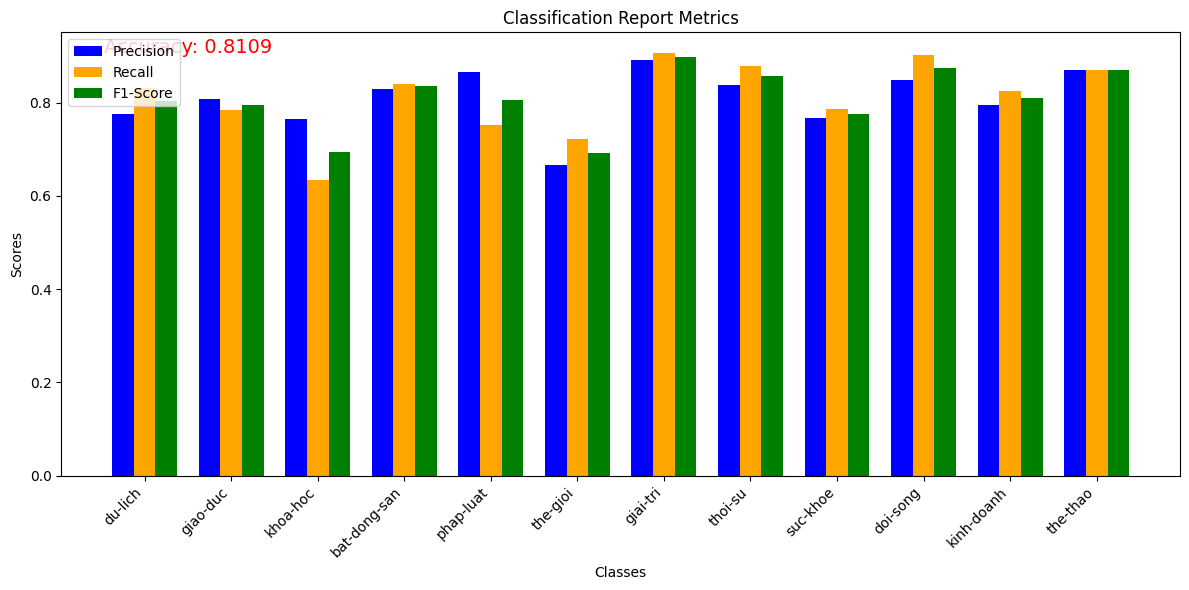

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Load true labels and predictions
true_labels = []
predicted_labels = []

# Evaluate the model
model_rnn.eval()
with torch.no_grad():
    for x, y in val_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model_rnn(x)
        predictions = output.argmax(dim=1)

        true_labels.extend(y.cpu().numpy())
        predicted_labels.extend(predictions.cpu().numpy())

# Define the labels map
labels_map = {
    0: 'du-lich', 1: 'giao-duc', 2: 'khoa-hoc', 3: 'bat-dong-san',
    4: 'phap-luat', 5: 'the-gioi', 6: 'giai-tri', 7: 'thoi-su',
    8: 'suc-khoe', 9: 'doi-song', 10: 'kinh-doanh', 11: 'the-thao'
}

# Generate classification report
class_names = [labels_map[i] for i in range(len(labels_map))]
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Extract precision, recall, f1-score
precision = [report[label]['precision'] for label in class_names]
recall = [report[label]['recall'] for label in class_names]
f1_score = [report[label]['f1-score'] for label in class_names]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Plotting
x = np.arange(len(labels_map))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision', color='blue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Annotating accuracy at the top of the plot
plt.text(0.5, max(precision + recall + f1_score), f'Accuracy: {accuracy:.4f}', ha='center', fontsize=14, color='red')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


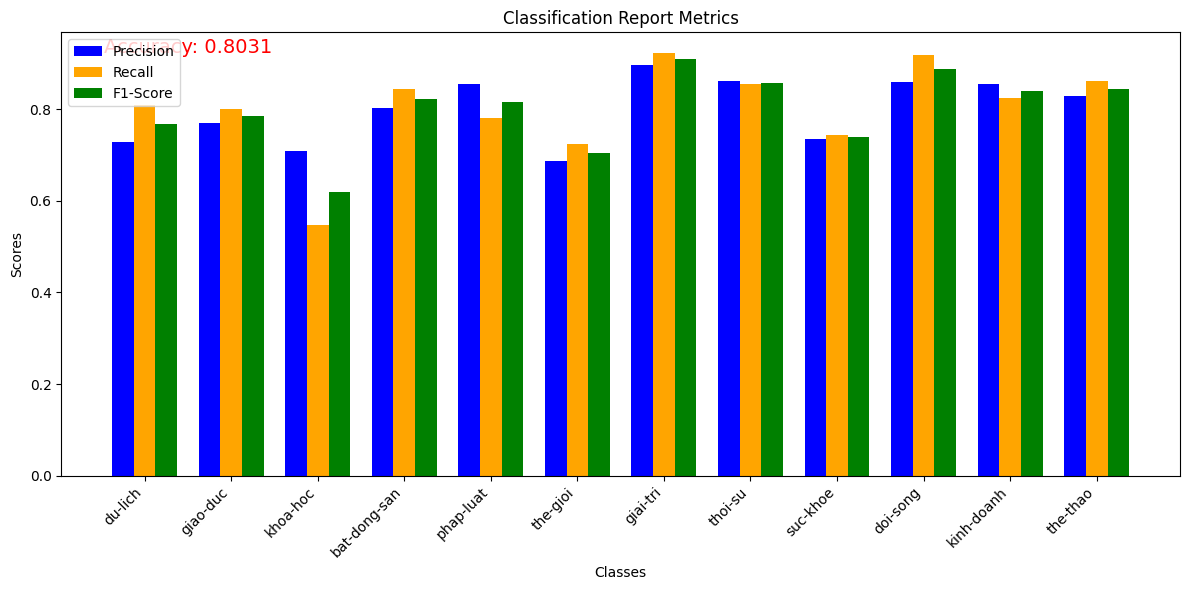

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Load true labels and predictions
true_labels = []
predicted_labels = []

# Evaluate the model
model_rnn.eval()
with torch.no_grad():
    for x, y in test_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model_rnn(x)
        predictions = output.argmax(dim=1)

        true_labels.extend(y.cpu().numpy())
        predicted_labels.extend(predictions.cpu().numpy())

# Define the labels map
labels_map = {
    0: 'du-lich', 1: 'giao-duc', 2: 'khoa-hoc', 3: 'bat-dong-san',
    4: 'phap-luat', 5: 'the-gioi', 6: 'giai-tri', 7: 'thoi-su',
    8: 'suc-khoe', 9: 'doi-song', 10: 'kinh-doanh', 11: 'the-thao'
}

# Generate classification report
class_names = [labels_map[i] for i in range(len(labels_map))]
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Extract precision, recall, f1-score
precision = [report[label]['precision'] for label in class_names]
recall = [report[label]['recall'] for label in class_names]
f1_score = [report[label]['f1-score'] for label in class_names]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Plotting
x = np.arange(len(labels_map))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision', color='blue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Annotating accuracy at the top of the plot
plt.text(0.5, max(precision + recall + f1_score), f'Accuracy: {accuracy:.4f}', ha='center', fontsize=14, color='red')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


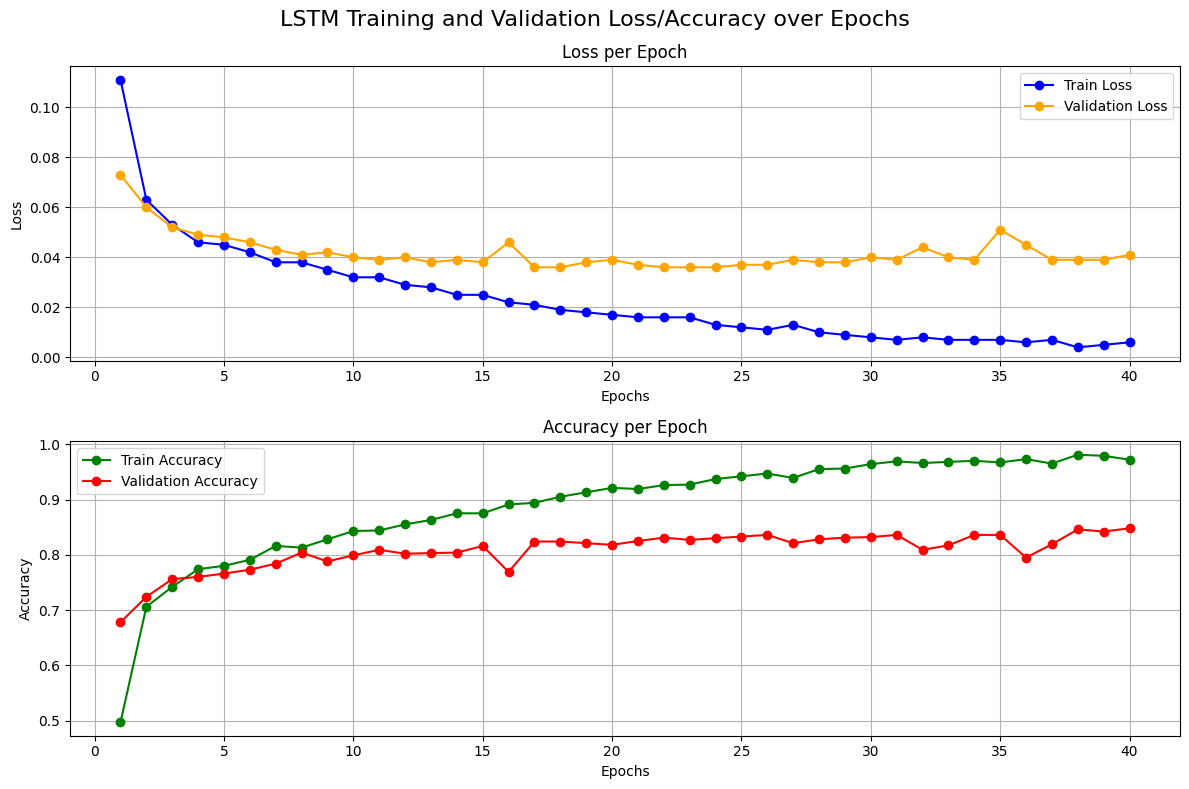

In [ ]:

# Dữ liệu từ nhật ký huấn luyện
epochs = list(range(1, 41))  # Số lượng epoch
train_loss = [0.111, 0.063, 0.053, 0.046, 0.045, 0.042, 0.038, 0.038, 0.035, 0.032, 0.032, 0.029, 0.028, 0.025, 0.025, 0.022, 0.021, 0.019, 0.018, 0.017, 0.016, 0.016, 0.016, 0.013, 0.012, 0.011, 0.013, 0.010, 0.009, 0.008, 0.007, 0.008, 0.007, 0.007, 0.007, 0.006, 0.007, 0.004, 0.005, 0.006]
val_loss = [0.073, 0.060, 0.052, 0.049, 0.048, 0.046, 0.043, 0.041, 0.042, 0.040, 0.039, 0.040, 0.038, 0.039, 0.038, 0.046, 0.036, 0.036, 0.038, 0.039, 0.037, 0.036, 0.036, 0.036, 0.037, 0.037, 0.039, 0.038, 0.038, 0.040, 0.039, 0.044, 0.040, 0.039, 0.051, 0.045, 0.039, 0.039, 0.039, 0.041]
train_accuracy = [0.497, 0.706, 0.742, 0.774, 0.780, 0.791, 0.816, 0.813, 0.828, 0.843, 0.844, 0.855, 0.863, 0.875, 0.875, 0.891, 0.894, 0.905, 0.913, 0.921, 0.919, 0.926, 0.927, 0.937, 0.942, 0.947, 0.939, 0.955, 0.956, 0.964, 0.969, 0.966, 0.968, 0.970, 0.967, 0.973, 0.965, 0.981, 0.979, 0.972]
val_accuracy = [
    0.678, 0.724, 0.756, 0.760, 0.766, 0.773, 0.784, 0.804, 0.788, 0.799,
    0.809, 0.802, 0.803, 0.804, 0.816, 0.769, 0.824, 0.824, 0.821, 0.818,
    0.825, 0.831, 0.827, 0.830, 0.833, 0.836, 0.821, 0.828, 0.831, 0.832,
    0.836, 0.809, 0.817, 0.836, 0.836, 0.795, 0.819, 0.846, 0.842, 0.848
]



# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

plt.suptitle('LSTM Training and Validation Loss/Accuracy over Epochs', fontsize=16)

# Train Loss và Val Loss
plt.subplot(2, 1, 1)
plt.plot(epochs, train_loss, label='Train Loss', color='blue', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Train Accuracy và Val Accuracy
plt.subplot(2, 1, 2)
plt.plot(epochs, train_accuracy, label='Train Accuracy', color='green', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


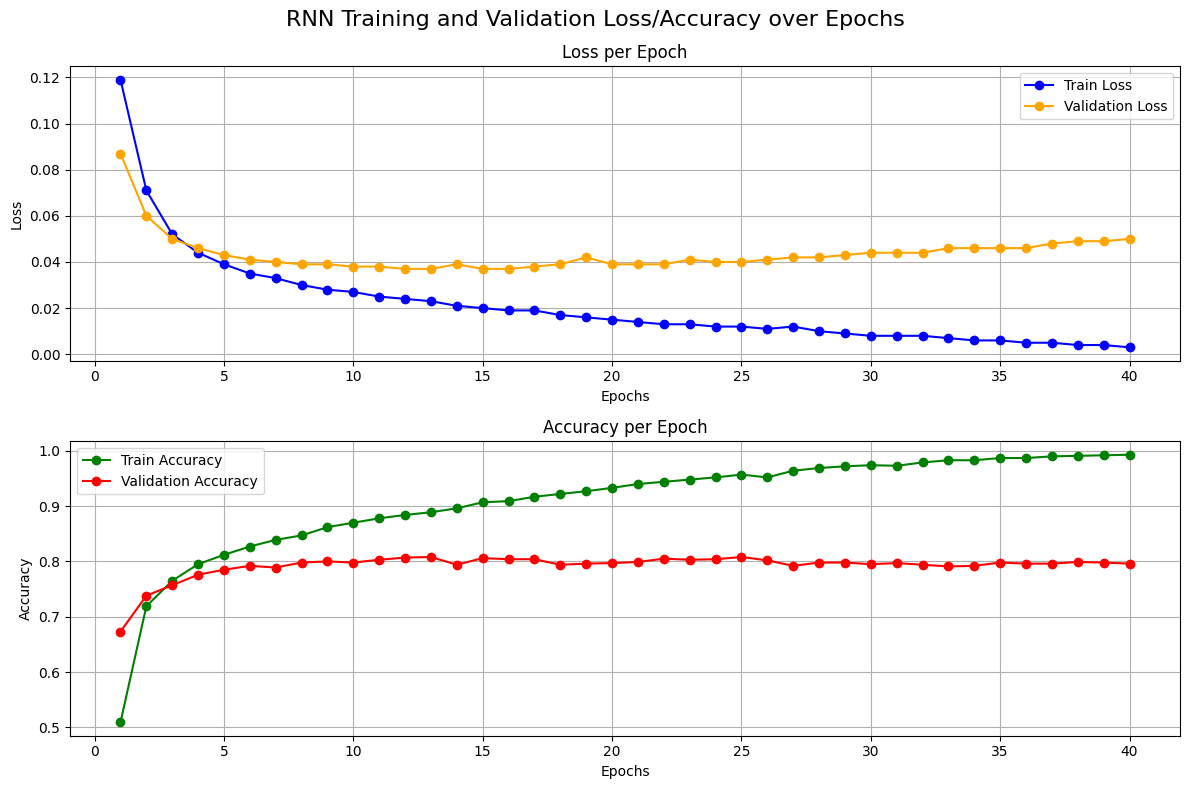

In [ ]:
import matplotlib.pyplot as plt

# Sample values for the new metrics (from your provided output)
epochs = list(range(1, 41))  # 40 epochs

train_loss = [0.119, 0.071, 0.052, 0.044, 0.039, 0.035, 0.033, 0.030, 0.028, 0.027,
                0.025, 0.024, 0.023, 0.021, 0.020, 0.019, 0.019, 0.017, 0.016, 0.015,
                0.014, 0.013, 0.013, 0.012, 0.012, 0.011, 0.012, 0.010, 0.009, 0.008,
                0.008, 0.008, 0.007, 0.006, 0.006, 0.005, 0.005, 0.004, 0.004, 0.003]

train_accuracy = [0.509, 0.719, 0.765, 0.795, 0.812, 0.827, 0.839, 0.847, 0.862, 0.870,
                    0.878, 0.884, 0.889, 0.896, 0.907, 0.909, 0.917, 0.922, 0.927, 0.933,
                    0.940, 0.944, 0.948, 0.952, 0.957, 0.952, 0.964, 0.969, 0.972, 0.974,
                    0.973, 0.979, 0.983, 0.983, 0.987, 0.987, 0.990, 0.991, 0.992, 0.993]

val_loss = [0.087, 0.060, 0.050, 0.046, 0.043, 0.041, 0.040, 0.039, 0.039, 0.038,
              0.038, 0.037, 0.037, 0.039, 0.037, 0.037, 0.038, 0.039, 0.042, 0.039,
              0.039, 0.039, 0.041, 0.040, 0.040, 0.041, 0.042, 0.042, 0.043, 0.044,
              0.044, 0.044, 0.046, 0.046, 0.046, 0.046, 0.048, 0.049, 0.049, 0.050]

val_accuracy = [0.673, 0.738, 0.757, 0.776, 0.785, 0.792, 0.789, 0.798, 0.800, 0.798,
                  0.803, 0.807, 0.808, 0.794, 0.806, 0.804, 0.804, 0.794, 0.796, 0.797,
                  0.799, 0.805, 0.803, 0.804, 0.808, 0.802, 0.792, 0.798, 0.798, 0.795,
                  0.797, 0.794, 0.791, 0.792, 0.798, 0.796, 0.796, 0.799, 0.798, 0.796]

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

plt.suptitle('RNN Training and Validation Loss/Accuracy over Epochs', fontsize=16)

# Train Loss và Val Loss
plt.subplot(2, 1, 1)
plt.plot(epochs, train_loss, label='Train Loss', color='blue', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Train Accuracy và Val Accuracy
plt.subplot(2, 1, 2)
plt.plot(epochs, train_accuracy, label='Train Accuracy', color='green', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()